In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Crop_recommendation.csv")
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1468,110,15,48,28.578200,92.865974,6.212567,27.598718,muskmelon
1382,101,11,51,25.507370,84.243402,6.792036,44.206900,watermelon
2041,80,52,39,26.419152,76.856912,7.165697,197.210178,jute
1887,18,12,35,26.139584,96.385808,6.338721,131.338794,coconut
1459,95,16,46,27.076727,90.143626,6.746695,24.451465,muskmelon
937,36,24,41,24.944676,94.257027,7.009180,103.879935,pomegranate
1290,38,141,198,13.058097,80.282980,5.757010,70.756336,grapes
590,35,38,19,25.326888,63.181803,9.112772,32.711293,mothbeans
1504,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
1003,86,76,54,29.315908,80.115857,5.926825,90.109781,banana


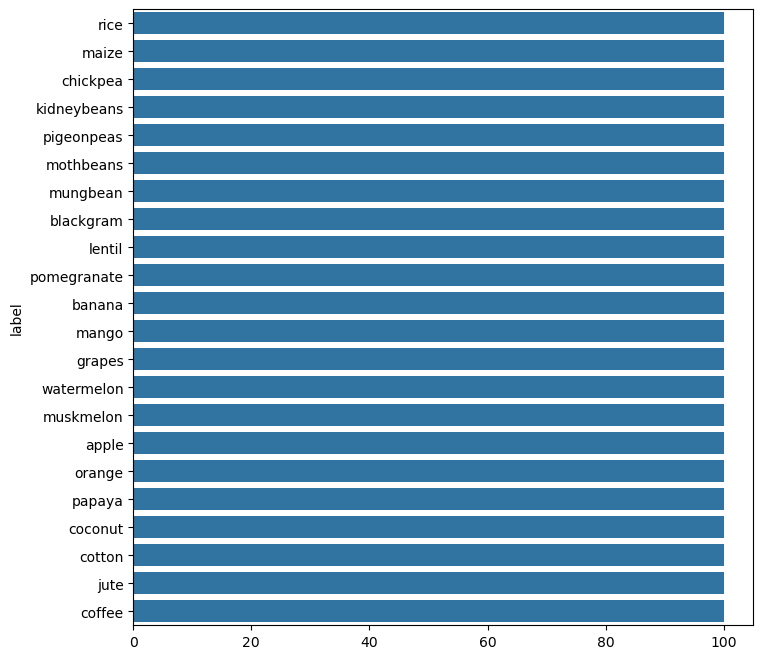

In [3]:
data = df["label"].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(y = data.index ,  x = data.values  )
plt.show()


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Figure size 500x500 with 0 Axes>

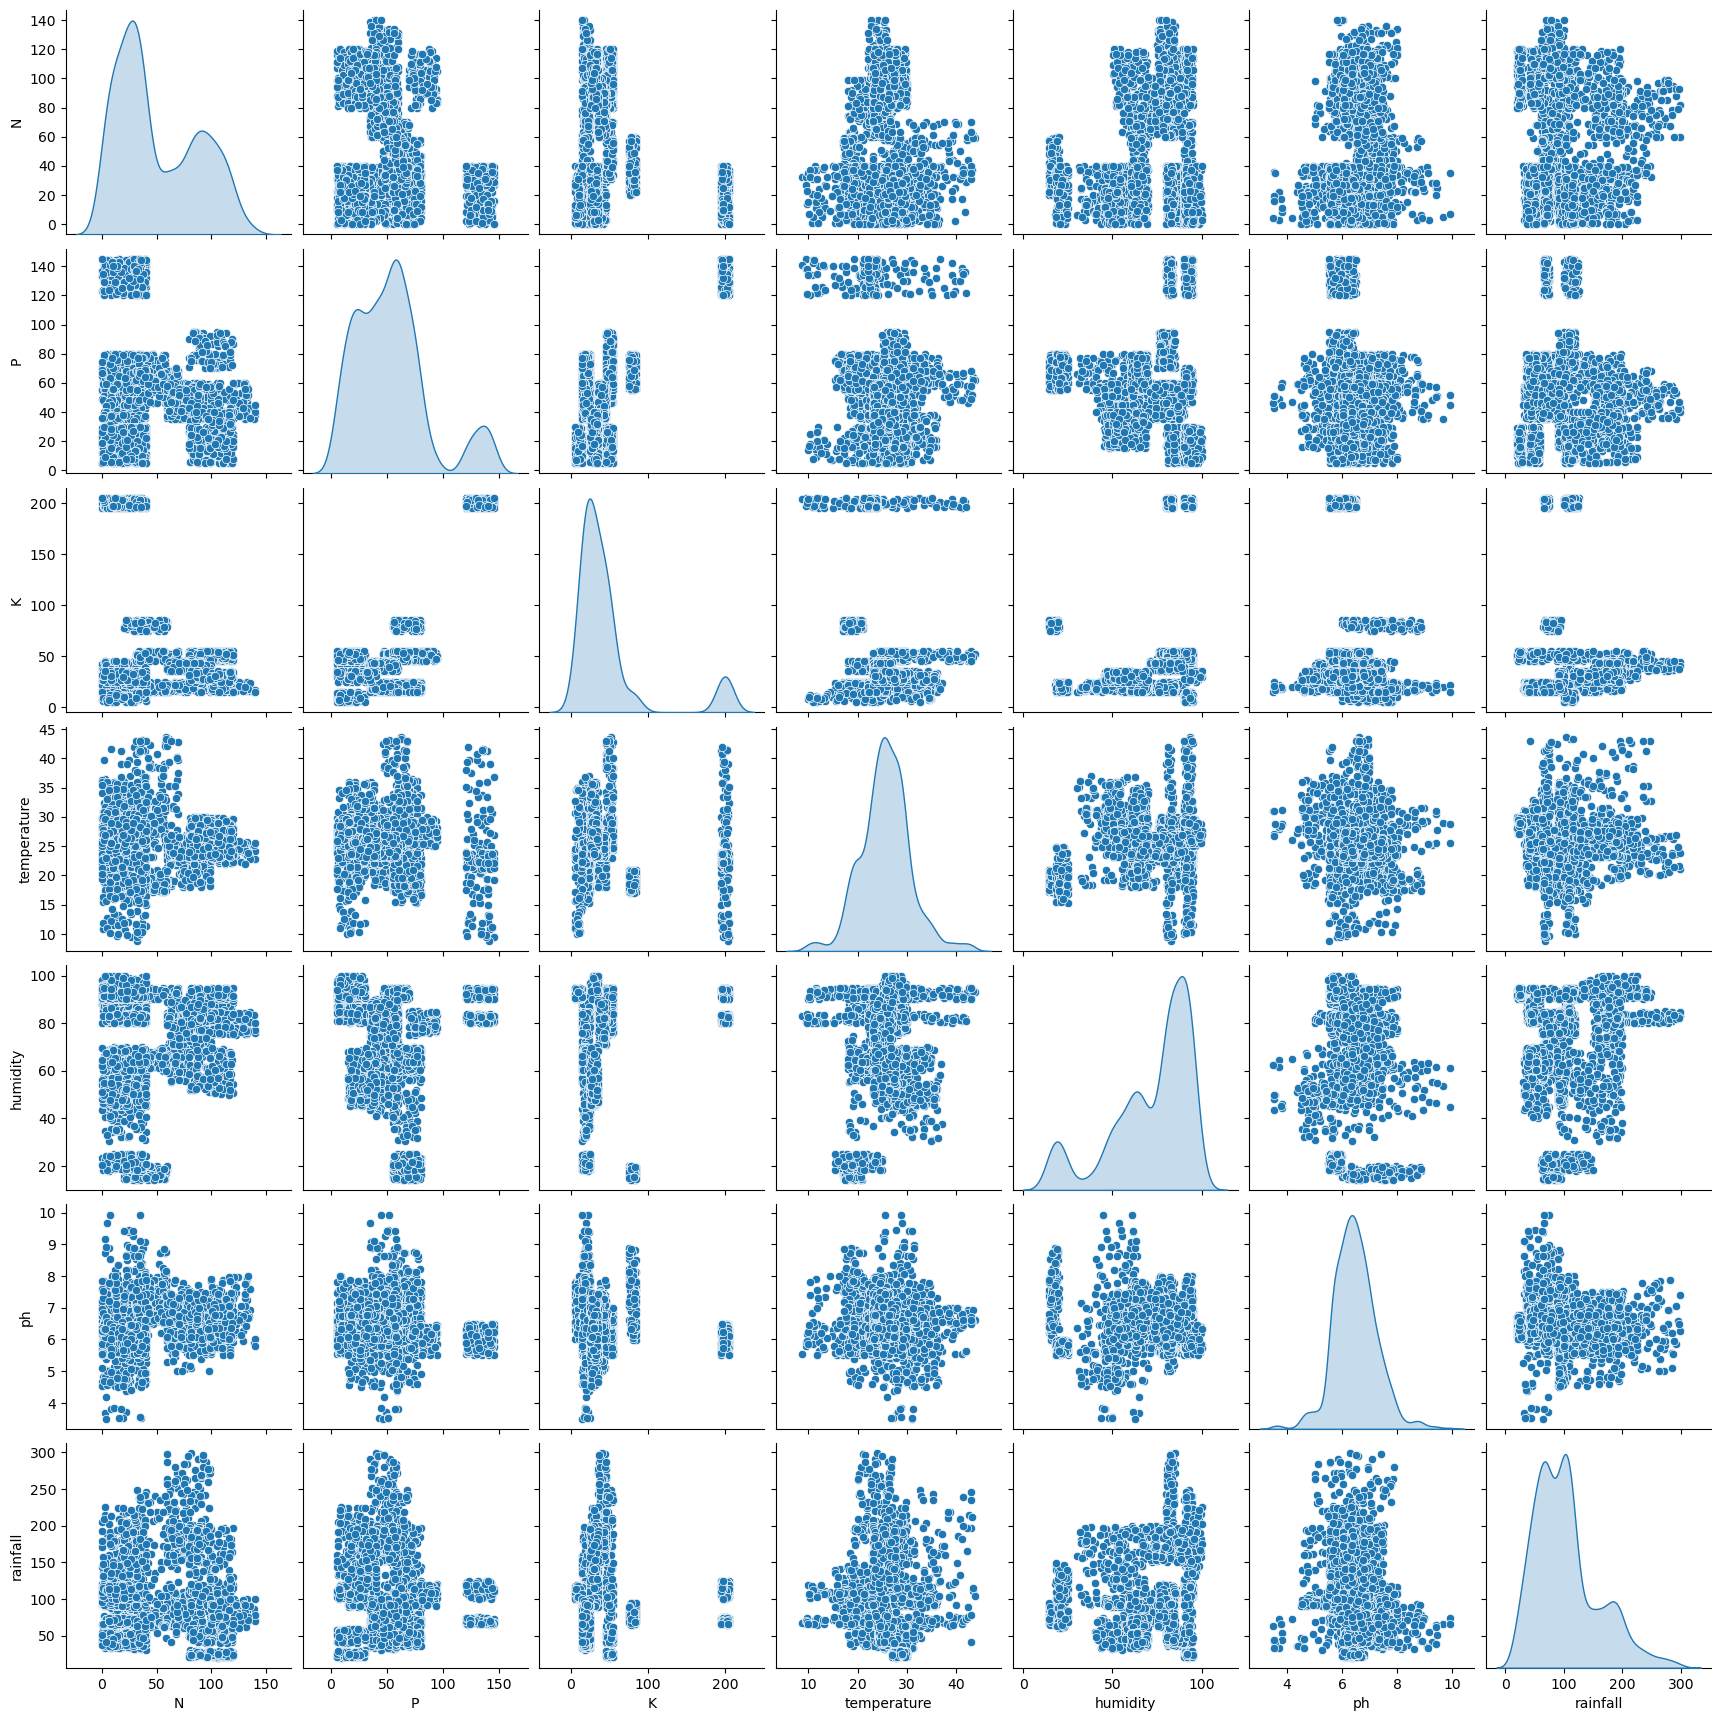

In [5]:
plt.figure(figsize=(5,5))
sns.pairplot(df,diag_kind='kde')

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(x_train.shape,y_train.shape)

(1540, 7) (1540,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)

x_train_transformed = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns , index=x_train.index)
x_train_transformed

,N,P,K,temperature,humidity,ph,rainfall
864,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1090,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
304,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
391,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
1686,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738
...,...,...,...,...,...,...,...
119,0.635991,0.052014,-0.574540,-1.470089,-0.383613,-0.233164,-0.347914
65,1.311309,-0.374384,-0.239227,-0.219565,0.507601,0.346587,1.441360
366,-0.822695,0.478413,-0.653437,-0.417734,-2.184524,-0.690397,0.073859
333,-1.119835,0.722070,-0.613988,-1.065445,-2.109138,-0.884657,0.051012


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(y_train)
y_train_encoded = pd.DataFrame(encoder.fit_transform(y_train) ,columns=["Crop_type"],index=y_train.index)
y_train_encoded

,Crop_type
864,10
1090,1
304,9
391,9
1686,16
...,...
119,11
65,20
366,9
333,9


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_transformed,y_train_encoded)

RandomForestClassifier()

In [25]:
y_test_pred = model.predict(scaler.transform(x_test))

from sklearn.metrics import accuracy_score

accuracy_score(encoder.transform(y_test),y_test_pred)

0.9924242424242424

In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("Standard Scaler",StandardScaler()),
    ("Random Forest Classifier Model" , RandomForestClassifier())
])

pipeline

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Random Forest Classifier Model', RandomForestClassifier())])

In [28]:
pipeline.fit(x_train,y_train_encoded)

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Random Forest Classifier Model', RandomForestClassifier())])

In [29]:
y_test_pred = pipeline.predict(x_test)
accuracy_score(encoder.transform(y_test),y_test_pred)

0.9939393939393939

In [1]:
import joblib

In [31]:
joblib.dump(pipeline,"Crop_Pridictor_Model.joblib")
joblib.dump(encoder,"crop_pridctor_label_encoder.joblib")

['crop_pridctor_label_encoder.joblib']